# Sales Forecasting - Data Preparation

This notebook prepares the data for forecasting by cleaning and engineering features.

## Objectives
- Clean and preprocess data
- Create time-based features
- Generate lag and rolling features
- Add seasonality indicators
- Save processed data

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import warnings
warnings.filterwarnings('ignore')

# Add src to path
sys.path.append('../src')

# Import custom modules
from data_preprocessing import (
    load_data, handle_missing_values, 
    prepare_time_series_data
)
from feature_engineering import create_all_features

print('✅ Libraries imported successfully')

✅ Libraries imported successfully


## 1. Load Data

In [2]:
# Load dataset
df = load_data('../data/raw/Sample - Superstore.csv')
df.head()

✅ Successfully loaded data: 9994 rows, 21 columns


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## 2. Data Cleaning

In [3]:
# Handle missing values
df_clean = handle_missing_values(df)

# Remove any negative sales (if present)
df_clean = df_clean[df_clean['Sales'] > 0]

print(f'\n✅ Cleaned data shape: {df_clean.shape}')


✅ No missing values found
✅ Missing values after cleaning: 0

✅ Cleaned data shape: (9994, 21)


## 3. Prepare Time Series Data

Aggregate sales by day and prepare for forecasting.

In [4]:
# Prepare daily time series
daily_sales = prepare_time_series_data(
    df_clean, 
    date_column='Order Date',
    value_column='Sales',
    freq='D'  # Daily frequency
)

# Display
print('\nDaily Sales Time Series:')
print(daily_sales.head())
print(f'\nShape: {daily_sales.shape}')


✅ Prepared time series data:
   Date range: 2014-01-03 00:00:00 to 2017-12-30 00:00:00
   Frequency: D
   Total periods: 1458

Daily Sales Time Series:
               Sales
Order Date          
2014-01-03    16.448
2014-01-04   288.060
2014-01-05    19.536
2014-01-06  4407.100
2014-01-07    87.158

Shape: (1458, 1)


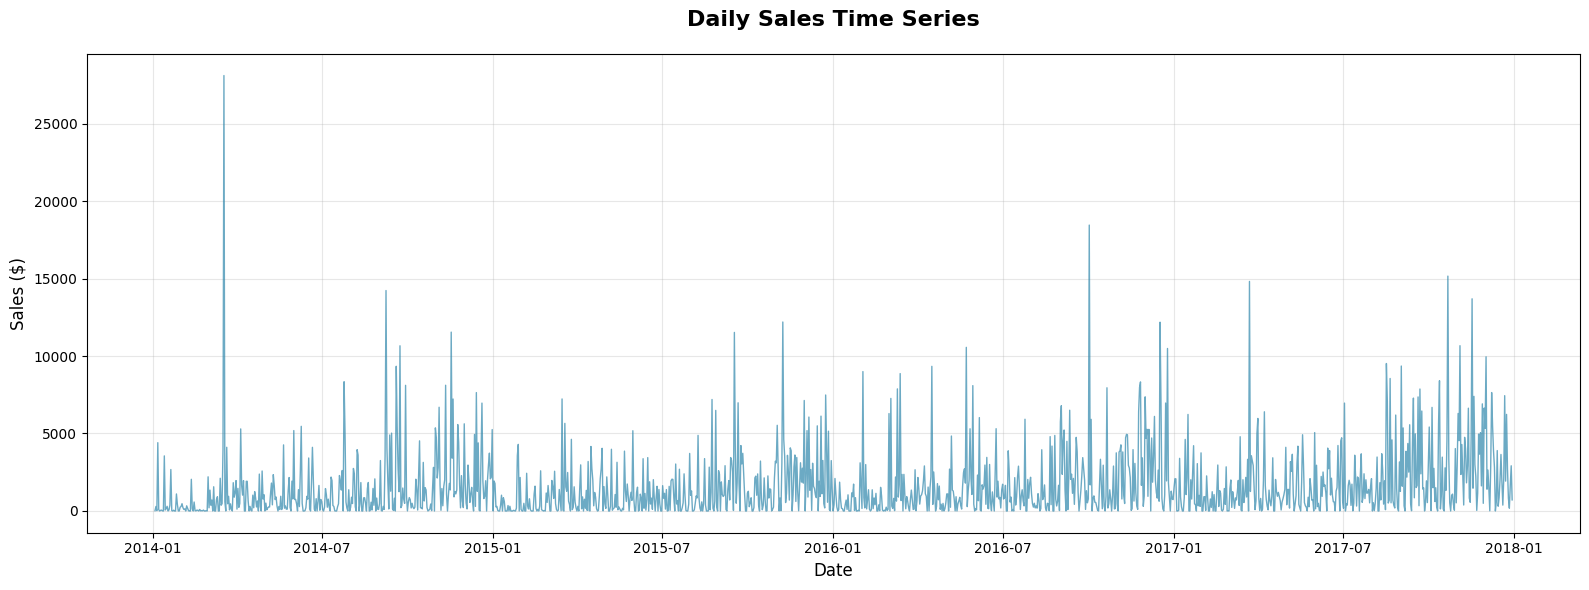

In [5]:
# Visualize daily sales
plt.figure(figsize=(16, 6))
plt.plot(daily_sales.index, daily_sales['Sales'], linewidth=1, color='#2E86AB', alpha=0.7)
plt.title('Daily Sales Time Series', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Sales ($)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 4. Feature Engineering

Create comprehensive features for ML models.

In [6]:
# Create all features
df_features = create_all_features(
    daily_sales,
    target_column='Sales',
    lag_periods=[1, 7, 14, 30],  # Previous day, week, 2 weeks, month
    rolling_windows=[7, 14, 30]  # 1 week, 2 weeks, 1 month windows
)

print('\nFeatures created:')
print(df_features.columns.tolist())
print(f'\nFinal shape: {df_features.shape}')


FEATURE ENGINEERING

✅ Created 11 time-based features
✅ Created 4 lag features for 'Sales'
✅ Created 12 rolling features for 'Sales'
✅ Created 9 seasonality features
✅ Created 1 difference features for 'Sales'

⚠️  Dropped 30 rows due to NaN values from feature engineering
✅ Final dataset: 1428 rows, 38 columns

FEATURE ENGINEERING COMPLETE

Features created:
['Sales', 'year', 'month', 'quarter', 'day_of_week', 'day_of_month', 'week_of_year', 'is_weekend', 'is_month_start', 'is_month_end', 'is_quarter_start', 'is_quarter_end', 'Sales_lag_1', 'Sales_lag_7', 'Sales_lag_14', 'Sales_lag_30', 'Sales_rolling_mean_7', 'Sales_rolling_std_7', 'Sales_rolling_min_7', 'Sales_rolling_max_7', 'Sales_rolling_mean_14', 'Sales_rolling_std_14', 'Sales_rolling_min_14', 'Sales_rolling_max_14', 'Sales_rolling_mean_30', 'Sales_rolling_std_30', 'Sales_rolling_min_30', 'Sales_rolling_max_30', 'month_sin', 'month_cos', 'day_of_week_sin', 'day_of_week_cos', 'is_spring', 'is_summer', 'is_fall', 'is_winter', 'is

In [7]:
# Display sample of features
df_features.head(10)

,Sales,year,month,quarter,day_of_week,day_of_month,week_of_year,is_weekend,is_month_start,is_month_end,...,month_sin,month_cos,day_of_week_sin,day_of_week_cos,is_spring,is_summer,is_fall,is_winter,is_holiday_season,Sales_diff_1
Order Date,,,,,,,,,,,,,,,,,,,,,
2014-02-02,211.646,2014,2,1,6,2,5,1,0,0,...,0.866025,0.5,-0.781831,0.623490,0,0,0,1,0,-257.254
2014-02-03,97.112,2014,2,1,0,3,6,0,0,0,...,0.866025,0.5,0.000000,1.000000,0,0,0,1,0,-114.534
2014-02-04,134.384,2014,2,1,1,4,6,0,0,0,...,0.866025,0.5,0.781831,0.623490,0,0,0,1,0,37.272
2014-02-05,0.000,2014,2,1,2,5,6,0,0,0,...,0.866025,0.5,0.974928,-0.222521,0,0,0,1,0,-134.384
2014-02-06,330.512,2014,2,1,3,6,6,0,0,0,...,0.866025,0.5,0.433884,-0.900969,0,0,0,1,0,330.512
2014-02-07,180.320,2014,2,1,4,7,6,0,0,0,...,0.866025,0.5,-0.433884,-0.900969,0,0,0,1,0,-150.192
2014-02-08,14.560,2014,2,1,5,8,6,1,0,0,...,0.866025,0.5,-0.974928,-0.222521,0,0,0,1,0,-165.760
2014-02-09,0.000,2014,2,1,6,9,6,1,0,0,...,0.866025,0.5,-0.781831,0.623490,0,0,0,1,0,-14.560
2014-02-10,0.000,2014,2,1,0,10,7,0,0,0,...,0.866025,0.5,0.000000,1.000000,0,0,0,1,0,0.000


## 5. Feature Correlation Analysis

Top 15 Features Correlated with Sales:
Sales                    1.000000
Sales_diff_1             0.661224
Sales_rolling_mean_7     0.461037
Sales_rolling_std_7      0.403885
Sales_rolling_max_7      0.402425
Sales_rolling_mean_14    0.389191
Sales_rolling_std_14     0.329459
Sales_rolling_mean_30    0.314139
Sales_rolling_max_14     0.307474
month                    0.254493
Sales_rolling_std_30     0.251315
week_of_year             0.241149
is_holiday_season        0.241033
quarter                  0.223485
Sales_rolling_max_30     0.207322
Name: Sales, dtype: float64


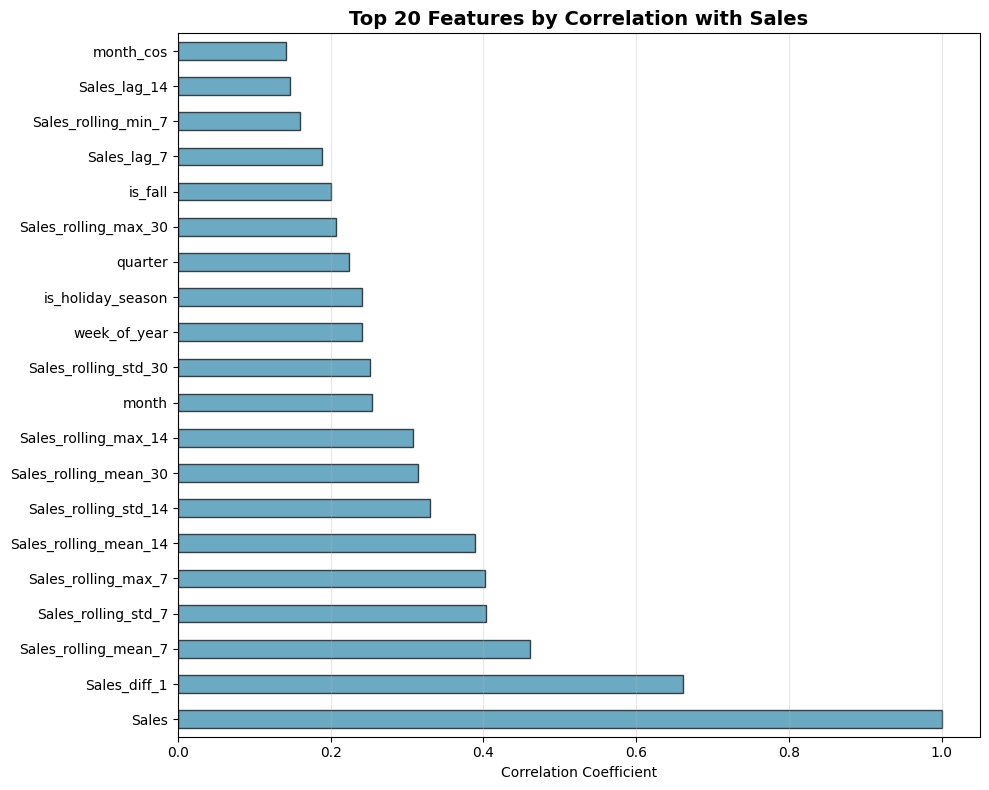

In [8]:
# Calculate correlation with target
correlations = df_features.corr()['Sales'].sort_values(ascending=False)

print('Top 15 Features Correlated with Sales:')
print(correlations.head(15))

# Visualize
plt.figure(figsize=(10, 8))
correlations.head(20).plot(kind='barh', color='#2E86AB', alpha=0.7, edgecolor='black')
plt.title('Top 20 Features by Correlation with Sales', fontsize=14, fontweight='bold')
plt.xlabel('Correlation Coefficient')
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

## 6. Save Processed Data

In [9]:
# Save processed data
df_features.to_csv('../data/processed/daily_sales_features.csv')
print('✅ Saved processed data to: data/processed/daily_sales_features.csv')

# Also save simple time series for ARIMA models
daily_sales.to_csv('../data/processed/daily_sales_simple.csv')
print('✅ Saved simple time series to: data/processed/daily_sales_simple.csv')

✅ Saved processed data to: data/processed/daily_sales_features.csv
✅ Saved simple time series to: data/processed/daily_sales_simple.csv


## Summary

**Data Preparation Complete:**
- Cleaned dataset and handled missing values
- Created daily time series aggregation
- Engineered comprehensive features:
  - Time-based features (year, month, day of week, etc.)
  - Lag features (1, 7, 14, 30 days)
  - Rolling statistics (7, 14, 30 day windows)
  - Seasonality indicators
- Saved processed data for modeling

**Next Steps:**
- Build and compare forecasting models
- Evaluate model performance
- Generate future predictions